# **EDA on Yahoo Finance Dataset**

In [ ]:
!pip install yfinance pandas numpy matplotlib seaborn

In [ ]:
import yfinance as yf
import pandas as pd

# Fetch historical data for a specific company (e.g., Apple)
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2024-01-01')

# Display the first few rows of the dataset
data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960464,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251137,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826866,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484344,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650360,132079200


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Fetch company info
company_info = yf.Ticker(ticker).info

# Display sector and industry
sector = company_info.get('sector', 'N/A')
industry = company_info.get('industry', 'N/A')
print(f"Sector: {sector}")
print(f"Industry: {industry}")


Sector: Technology
Industry: Consumer Electronics


In [ ]:
# Fetch financial statements
ticker_obj = yf.Ticker(ticker)
financials = ticker_obj.financials
balance_sheet = ticker_obj.balance_sheet
cash_flow = ticker_obj.cashflow

# Display financial statements
print("\nIncome Statement:")
print(financials.head())

print("\nBalance Sheet:")
print(balance_sheet.head())

print("\nCash Flow Statement:")
print(cash_flow.head())



Income Statement:
                                                        2023-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                           0.147   
Normalized EBITDA                                   129188000000.0   
Net Income From Continuing Operation Net Minori...   96995000000.0   
Reconciled Depreciation                              11519000000.0   

                                                        2022-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                           0.162   
Normalized EBITDA                                   133138000000.0   
Net Income From Continuing Operation Net Minori...   99803000000.0   
Reconciled Depreciation                              11104000000.0   

                                                        2021-09-30  \
Tax Effect Of Unusual Items                                    0.0   

In [ ]:
# Extract key financial ratios
key_ratios = {
    'Market Cap': company_info.get('marketCap'),
    'P/E Ratio': company_info.get('trailingPE'),
    'Dividend Yield': company_info.get('dividendYield'),
    'Beta': company_info.get('beta'),
    '52-Week High': company_info.get('fiftyTwoWeekHigh'),
    '52-Week Low': company_info.get('fiftyTwoWeekLow'),
    'EPS': company_info.get('earningsPerShare'),
    'Price-to-Book Ratio': company_info.get('priceToBook'),
    'Debt-to-Equity Ratio': company_info.get('debtToEquity')
}

key_ratios_df = pd.DataFrame([key_ratios])
print("\nKey Financial Ratios:")
print(key_ratios_df)



Key Financial Ratios:
      Market Cap  P/E Ratio  Dividend Yield   Beta  52-Week High  52-Week Low  \
0  3181762052096   31.85236          0.0048  1.244        237.23       164.08   

    EPS  Price-to-Book Ratio  Debt-to-Equity Ratio  
0  None            47.756733               151.862  


In [ ]:
# Fetch historical data
historical_data = ticker_obj.history(period='1y')

# Calculate moving averages
historical_data['SMA_50'] = historical_data['Close'].rolling(window=50).mean()
historical_data['SMA_200'] = historical_data['Close'].rolling(window=200).mean()

# Display technical indicators
print("\nTechnical Indicators:")
print(historical_data[['Close', 'SMA_50', 'SMA_200']].head())



Technical Indicators:
                                Close  SMA_50  SMA_200
Date                                                  
2023-08-07 00:00:00-04:00  177.905197     NaN      NaN
2023-08-08 00:00:00-04:00  178.850174     NaN      NaN
2023-08-09 00:00:00-04:00  177.248688     NaN      NaN
2023-08-10 00:00:00-04:00  177.029846     NaN      NaN
2023-08-11 00:00:00-04:00  177.089600     NaN      NaN


In [ ]:
# Fetch dividend data
dividends = ticker_obj.dividends

# Display dividend data
print("\nDividend Data:")
print(dividends.head())



Dividend Data:
Date
2023-08-11 00:00:00-04:00    0.24
2023-11-10 00:00:00-05:00    0.24
2024-02-09 00:00:00-05:00    0.24
2024-05-10 00:00:00-04:00    0.25
Name: Dividends, dtype: float64


In [ ]:
# Fetch stock splits
splits = ticker_obj.splits

# Display splits data
print("\nSplits and Corporate Actions:")
print(splits.head())



Splits and Corporate Actions:
Series([], Name: Stock Splits, dtype: float64)


In [ ]:
import yfinance as yf
import pandas as pd

# Fetch data
ticker = 'AAPL'
ticker_obj = yf.Ticker(ticker)
company_info = ticker_obj.info
financials = ticker_obj.financials
balance_sheet = ticker_obj.balance_sheet
cash_flow = ticker_obj.cashflow
historical_data = ticker_obj.history(period='1y')
dividends = ticker_obj.dividends
splits = ticker_obj.splits

# Key Financial Ratios
key_ratios = {
    'Market Cap': company_info.get('marketCap'),
    'P/E Ratio': company_info.get('trailingPE'),
    'Dividend Yield': company_info.get('dividendYield'),
    'Beta': company_info.get('beta'),
    '52-Week High': company_info.get('fiftyTwoWeekHigh'),
    '52-Week Low': company_info.get('fiftyTwoWeekLow'),
    'EPS': company_info.get('earningsPerShare'),
    'Price-to-Book Ratio': company_info.get('priceToBook'),
    'Debt-to-Equity Ratio': company_info.get('debtToEquity')
}

# Calculate technical indicators
historical_data['SMA_50'] = historical_data['Close'].rolling(window=50).mean()
historical_data['SMA_200'] = historical_data['Close'].rolling(window=200).mean()

# Display data
print("Company Information:")
print(pd.DataFrame([company_info]).head())

print("\nIncome Statement:")
print(financials.head())

print("\nBalance Sheet:")
print(balance_sheet.head())

print("\nCash Flow Statement:")
print(cash_flow.head())

print("\nKey Financial Ratios:")
print(pd.DataFrame([key_ratios]))

print("\nTechnical Indicators:")
print(historical_data[['Close', 'SMA_50', 'SMA_200']].head())

print("\nDividend Data:")
print(dividends.head())

print("\nSplits and Corporate Actions:")
print(splits.head())


Company Information:
             address1       city state    zip        country         phone  \
0  One Apple Park Way  Cupertino    CA  95014  United States  408 996 1010   

                 website              industry           industryKey  \
0  https://www.apple.com  Consumer Electronics  consumer-electronics   

           industryDisp  ... returnOnEquity freeCashflow operatingCashflow  \
0  Consumer Electronics  ...        1.60583  86158123008      113040998400   

  earningsGrowth  revenueGrowth grossMargins  ebitdaMargins  operatingMargins  \
0          0.111          0.049      0.45962        0.34175           0.29556   

   financialCurrency  trailingPegRatio  
0                USD            2.0592  

[1 rows x 132 columns]

Income Statement:
                                                        2023-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                           0.147   
Normalized EBITDA     

In [ ]:
# Summary statistics
print(data.describe())

              Open         High          Low        Close    Adj Close  \
count  1006.000000  1006.000000  1006.000000  1006.000000  1006.000000   
mean    140.675507   142.321389   139.143536   140.808131   139.024960   
std      33.310018    33.430571    33.179199    33.313857    33.615818   
min      57.020000    57.125000    53.152500    56.092499    54.632896   
25%     123.682503   125.030003   122.157499   123.592501   121.328175   
50%     145.540001   147.264999   144.120003   145.860001   143.920898   
75%     166.302498   168.147503   164.815002   166.214996   164.457195   
max     198.020004   199.619995   197.000000   198.110001   197.589523   

             Volume  
count  1.006000e+03  
mean   9.895211e+07  
std    5.439653e+07  
min    2.404830e+07  
25%    6.407675e+07  
50%    8.467540e+07  
75%    1.155069e+08  
max    4.265100e+08  


In [ ]:
# Check for missing values
print(data.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


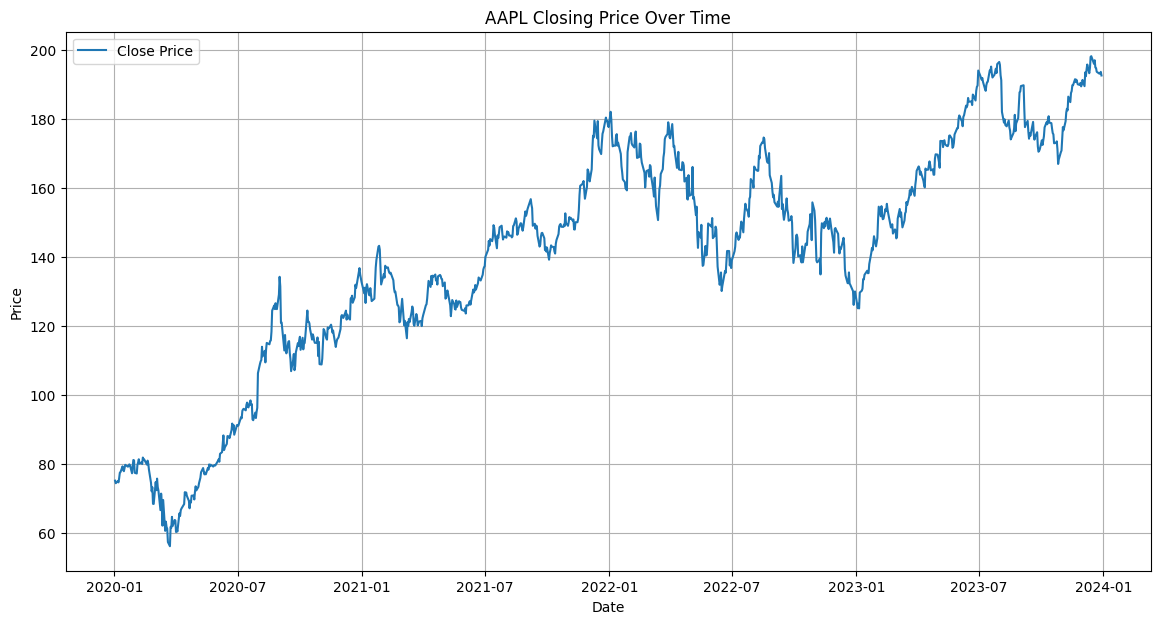

In [ ]:

# Plot closing price over time
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.title(f'{ticker} Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

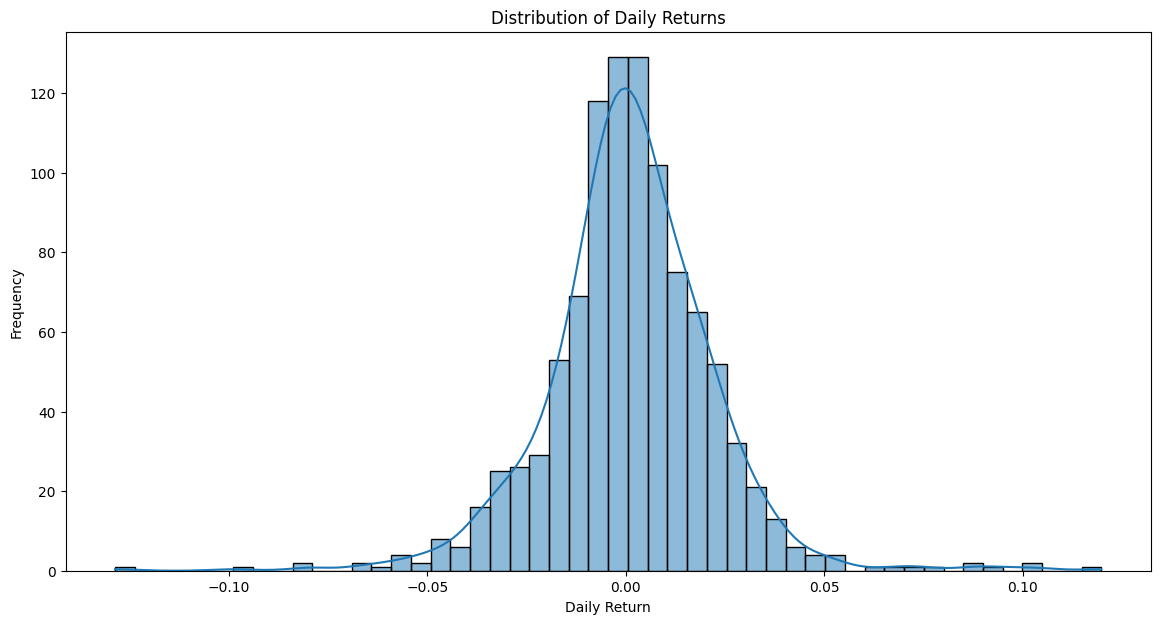

In [ ]:
# Plot daily returns
data['Daily Return'] = data['Close'].pct_change()
plt.figure(figsize=(14, 7))
sns.histplot(data['Daily Return'].dropna(), bins=50, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

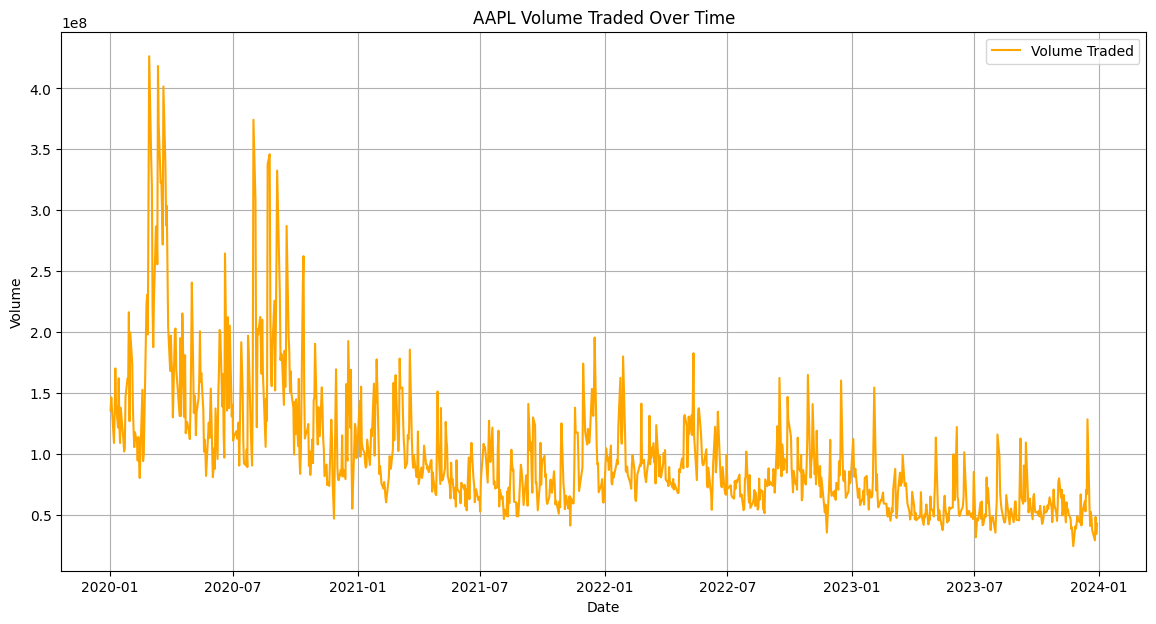

In [ ]:
# Plot volume traded over time
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Volume'], label='Volume Traded', color='orange')
plt.title(f'{ticker} Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import yfinance as yf
import pandas as pd

# List of tickers
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Fetch sector and industry info for each ticker
def get_company_info(ticker):
    try:
        info = yf.Ticker(ticker).info
        return {
            'Ticker': ticker,
            'Sector': info.get('sector', 'N/A'),
            'Industry': info.get('industry', 'N/A')
        }
    except Exception as e:
        print(f"Could not retrieve data for {ticker}: {e}")
        return None

# Apply function to all tickers
data = [get_company_info(ticker) for ticker in tickers]

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


  Ticker                  Sector                        Industry
0   AAPL              Technology            Consumer Electronics
1   MSFT              Technology       Software - Infrastructure
2  GOOGL  Communication Services  Internet Content & Information
3   AMZN       Consumer Cyclical                 Internet Retail
4   TSLA       Consumer Cyclical              Auto Manufacturers
